In [50]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Upload your dataset in Colab first
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/drive/MyDrive/ML practicals/laptop_data_cleaned.csv")


Saving laptop_data_cleaned.csv to laptop_data_cleaned (1).csv


In [51]:
df.shape

(1273, 13)

In [52]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# **A. Data Cleaning & Preparation**
# 1. Inspect dataset

In [53]:
df.shape          # To print no. of rows & column

(1273, 13)

In [54]:
df.info()         # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [55]:
df.isnull().sum() # to find missing values

,0
Company,0
TypeName,0
Ram,0
Weight,0
Price,0
TouchScreen,0
Ips,0
Ppi,0
Cpu_brand,0
HDD,0


# 2. Fix inconsistent categorical entries

In [56]:
df['Company'].unique()
df['TypeName'].unique()
df['Cpu_brand'].unique()
df['Gpu_brand'].unique()
df['Os'].unique()


array(['Mac', 'Others', 'Windows'], dtype=object)

# 3. Ensure numeric columns

In [7]:
numeric_cols = ['Ram','Weight','Price','Ppi','HDD','SSD']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 4. Convert binary columns

In [8]:
df['TouchScreen'] = df['TouchScreen'].astype('category')
df['Ips'] = df['Ips'].astype('category')


# 5. Create new features

In [57]:
df['total_storage'] = df['HDD'] + df['SSD']
df['price_per_gb'] = df['Price'] / df['total_storage']
df.head()


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,total_storage,price_per_gb
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,128,0.087311
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,0,inf
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others,256,0.040351
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,512,0.023075
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,256,0.044817


# B. Exploratory Data Analysis (EDA)
**6. Price Distribution**

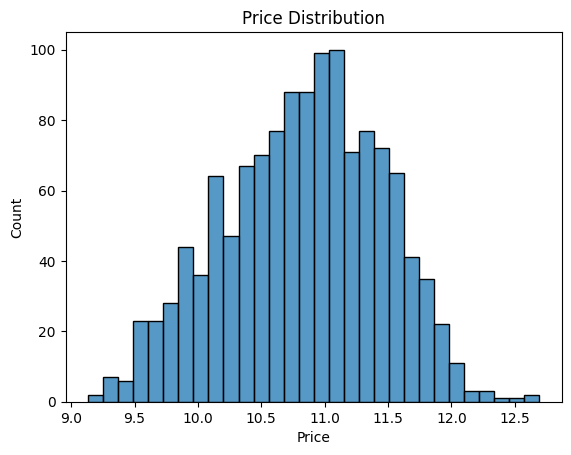

In [58]:
plt.figure()
sns.histplot(df['Price'], bins=30)
plt.title("Price Distribution")
plt.show()


# 7. Average price by Company

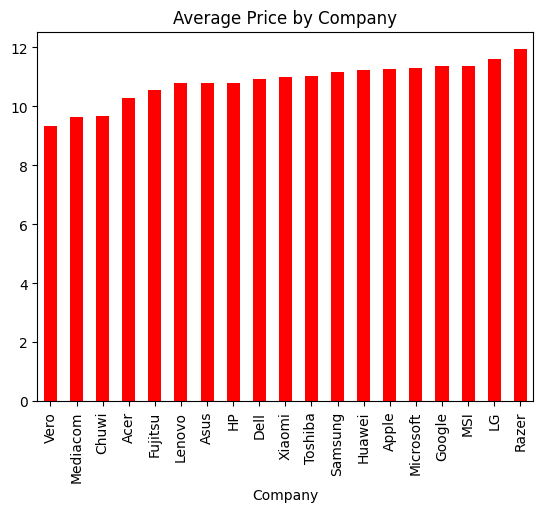

In [59]:
df.groupby('Company')['Price'].mean().sort_values().plot(kind='bar', color='red')
plt.title("Average Price by Company")
plt.show()


# 8. Average price by Type

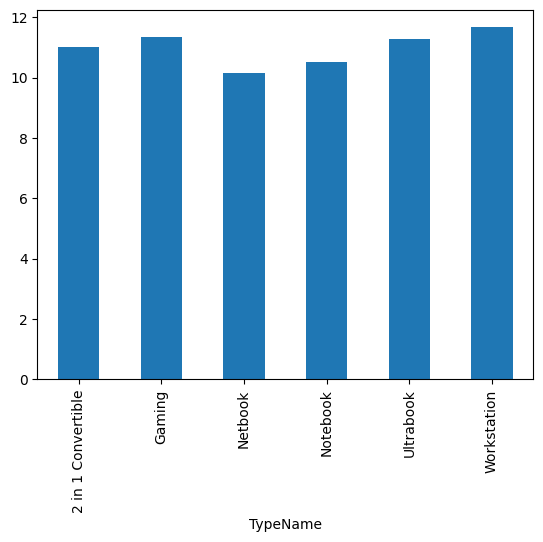

In [60]:
df.groupby('TypeName')['Price'].mean().plot(kind='bar')
plt.show()


# 9. Touchscreen vs Price

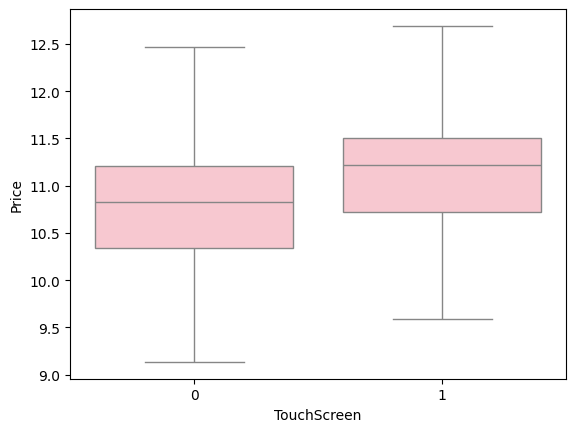

In [61]:
sns.boxplot(x='TouchScreen', y='Price', data=df, color='pink')
plt.show()


# 10. RAM vs Price

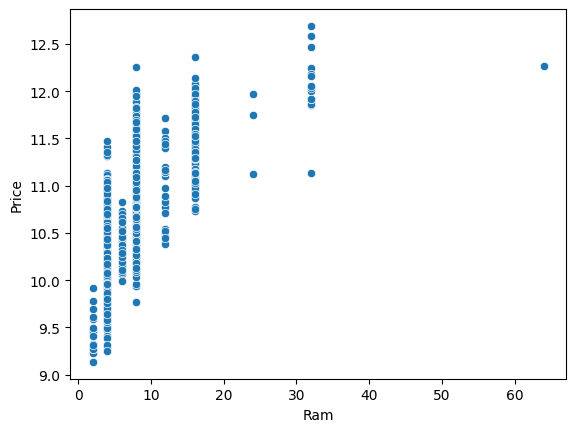

In [62]:
sns.scatterplot(x='Ram', y='Price', data=df)
plt.show()


# 11. SSD impact on Price

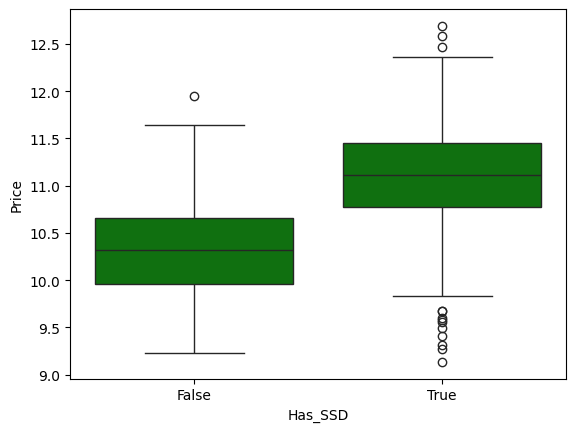

In [63]:
df['Has_SSD'] = df['SSD'] > 0
sns.boxplot(x='Has_SSD', y='Price', data=df,color='green')
plt.show()


# 12. Count by OS

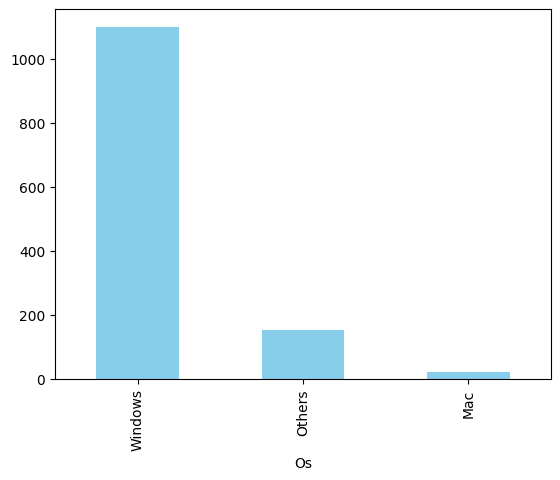

In [64]:
df['Os'].value_counts().plot(kind='bar',color='skyblue')
plt.show()


# 13. Average PPI by Type

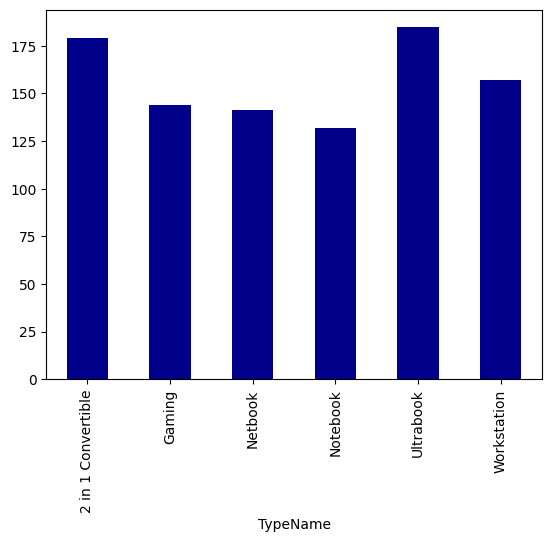

In [65]:
df.groupby('TypeName')['Ppi'].mean().plot(kind='bar',color='darkblue')
plt.show()


# 14. Top 5 expensive brands

In [66]:
df.groupby('Company')['Price'].mean().sort_values(ascending=False).head(5)


,Price
Company,
Razer,11.940528
LG,11.621737
MSI,11.383340
Google,11.374981
Microsoft,11.305010


# 15. Weight vs Price

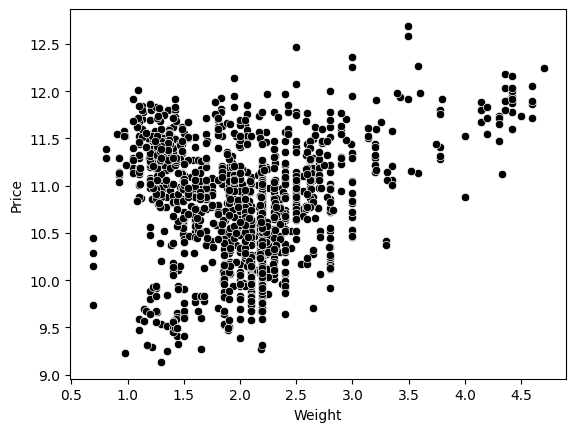

In [67]:
sns.scatterplot(x='Weight', y='Price', data=df,color='black')
plt.show()


# C. Feature Engineering & Insights
# 16. Performance Index

In [68]:
df['performance_index'] = df['Ram'] * df['Ppi']

# 17. Top 10% high-performance laptops

In [69]:
df['performance_index'].describe()


,performance_index
count,1273.000000
mean,1305.906527
std,1037.201261
min,200.909340
25%,564.847992
50%,1129.695985
75%,1325.056944
max,9037.567877


In [70]:
threshold = df['performance_index'].quantile(0.50)
df[df['performance_index'] > threshold]

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,total_storage,price_per_gb,Has_SSD,performance_index
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,128,0.087311,True,1815.864037
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,512,0.023075,True,3528.553982
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,256,0.044817,True,1815.864037
6,Apple,Ultrabook,16,2.04,11.644108,0,1,220.534624,Intel Core i7,0,0,Intel,Mac,0,inf,False,3528.553982
8,Asus,Ultrabook,16,1.30,11.285443,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows,512,0.022042,True,2517.608194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,Dell,2 in 1 Convertible,8,1.24,11.478299,1,0,276.053530,Intel Core i5,0,256,Intel,Windows,256,0.044837,True,2208.428241
1252,Lenovo,Notebook,8,1.90,10.952842,0,1,157.350512,Intel Core i5,0,256,Intel,Windows,256,0.042785,True,1258.804097
1255,Asus,Gaming,16,4.00,11.525170,0,1,127.335675,Intel Core i7,1000,128,Nvidia,Windows,1128,0.010217,True,2037.370793
1260,Asus,Ultrabook,8,1.20,10.567235,0,1,165.632118,Other Intel Processor,0,512,Intel,Windows,512,0.020639,True,1325.056944


# 18. Price Categories

In [71]:
def price_category(x):
    if x < 40000:
        return "Budget"
    elif x < 80000:
        return "Mid-range"
    else:
        return "Premium"

df['Price_Category'] = df['Price'].apply(price_category)
df['Price_Category'].value_counts()


,count
Price_Category,
Budget,1273


# 19. SSD vs HDD preference by brand

In [72]:
pd.crosstab(df['Company'], df['Has_SSD'])


Has_SSD,False,True
Company,,
Acer,58,43
Apple,10,11
Asus,53,98
Chuwi,3,0
Dell,95,196
Fujitsu,1,2
Google,0,3
HP,104,164
Huawei,0,2


# 20. CPU brand vs average price

In [73]:
df.groupby('Cpu_brand')['Price'].mean().sort_values()


,Price
Cpu_brand,
Other Intel Processor,10.016024
AMD Processor,10.187411
Intel Core i3,10.241859
Intel Core i5,10.832909
Intel Core i7,11.273958


# 21. Lightweight vs Heavy comparison

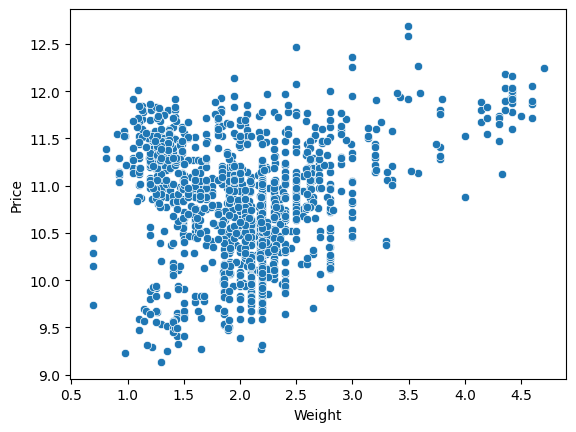

In [74]:
sns.scatterplot(x='Weight', y='Price', data=df)
plt.show()


# 22. GPU impact

In [75]:
df.groupby('Gpu_brand')['Price'].mean().sort_values()


,Price
Gpu_brand,
AMD,10.512561
Intel,10.720922
Nvidia,11.157394


# 23. Highest storage at lowest price

In [76]:
df.groupby('Company')['total_storage'].mean().sort_values(ascending=False)

,total_storage
Company,
MSI,1213.777778
Asus,786.860927
Dell,670.749141
Razer,578.285714
Lenovo,546.837370
Acer,529.940594
HP,519.253731
LG,512.000000
Fujitsu,504.000000


# 24. Premium + Low Weight laptops

In [77]:
df[(df['Price_Category']=="Premium") & (df['Weight']<1.5)]


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,total_storage,price_per_gb,Has_SSD,performance_index,Price_Category


Define Features (X) and Target (y)

In [78]:
X = df.drop("Price", axis=1)
y = df["Price"]

Identify Categorical and Numerical Columns

In [79]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

Creating Preprocessing Pipeline

In [80]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

Train-Test Split (80–20)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Linear Regression Model**

In [81]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])
preprocessor_fixed = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_fixed),
    ('model', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Results
MAE: 0.2120481161112681
MSE: 0.04900746115692036
R2 Score: 0.8420179612473058


# **Decision Tree Regressor**

In [82]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)

print("\nDecision Tree Results")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Results
MAE: 0.4840282130000002
MSE: 0.3204627699069993
R2 Score: -0.03305416234756686


# **Random Forest Regressor**

In [83]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print("\nRandom Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Results
MAE: 0.32729344187776616
MSE: 0.11883343651605145
R2 Score: 0.6169246859639933


# **Comparing Models**

In [84]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

results

,Model,MAE,R2 Score
0,Linear Regression,0.212048,0.842018
1,Decision Tree,0.484028,-0.033054
2,Random Forest,0.327293,0.616925


In [85]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,total_storage,price_per_gb,Has_SSD,performance_index,Price_Category
13,Dell,Notebook,4,2.20,0,0,141.211998,Intel Core i3,0,256,AMD,Windows,256,0.039797,True,564.847992,Budget
5,Acer,Notebook,4,2.10,0,0,100.454670,AMD Processor,500,0,AMD,Windows,500,0.019934,False,401.818680,Budget
8,Asus,Ultrabook,16,1.30,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows,512,0.022042,True,2517.608194,Budget
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others,256,0.040351,True,1129.695985,Budget
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,0,NaN,False,1021.423521,Budget
14,Apple,Ultrabook,8,0.92,0,1,226.415547,Other Intel Processor,0,256,Intel,Mac,256,0.043423,True,1811.324378,Budget
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,256,0.044817,True,1815.864038,Budget
7,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,0,NaN,False,1021.423521,Budget
10,HP,Notebook,4,1.86,0,0,100.454670,Intel Core i5,500,0,Intel,Others,500,0.019903,False,401.818680,Budget
12,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,256,AMD,Mac,256,0.045997,True,3528.553982,Budget


In [86]:
X_test

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,total_storage,price_per_gb,Has_SSD,performance_index,Price_Category
9,Acer,Ultrabook,8,1.60,0,1,157.350512,Intel Core i5,0,256,Intel,Windows,256,0.041492,True,1258.804097,Budget
11,HP,Notebook,4,1.86,0,0,141.211998,Intel Core i3,500,0,Intel,Others,500,0.019638,False,564.847992,Budget
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,128,0.087311,True,1815.864038,Budget


In [87]:
y_train

,Price
13,10.187967
5,9.967026
8,11.285443
2,10.329931
1,10.776777
14,11.116331
4,11.473101
7,11.030615
10,9.951658
12,11.775302


In [88]:
y_test

,Price
9,10.621952
11,9.819076
0,11.175755
